<a href="https://colab.research.google.com/github/VinodKumar9576/TIPS/blob/master/Tips/Handling imbalanced data 21 04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Very small sample for +ve class and very big sample for -ve class - imbalanced dataset.
* Example imbalanced datasets:

  * **Finance** : Fraud detection dataset having fraud rate of 1-2%.
  * **Ad Serving** : Click prediction datasets, don't have high clickthrough rate.
  * **Medical** : Does patient has cancer?
  * **Content moderation** : Does a post contain NSFW content?
* Below are the techniques to follow to handle imalanced datasets.
* Checkout the links:<br>
https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/ <br>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

#1 Random Undersampling and Oversampling

* **Undersampling** : Removing samples from majority class.
* **Oversampling** : Adding more samples from minority class

* Creating imbalanced dataset

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd

X, Y = make_classification(
    n_classes = 2, class_sep = 1.5, weights = [0.9,0.1],
    n_informative = 3, n_redundant = 1, flip_y = 0,
    n_features=20, n_clusters_per_class = 1,
    n_samples = 100, random_state=10
)

X_samp = pd.DataFrame(X)
X_samp['target'] = Y

#X = pd.DataFrame(X)
#Y = pd.DataFrame(Y)


In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
X_samp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,target
0,0.327419,-0.123936,0.377707,-0.650123,0.267562,1.228781,2.208772,-0.185977,0.238732,-2.565438,-0.383111,0.644056,0.104375,-1.703024,-0.510083,-0.108812,-0.230132,1.553707,1.497538,-1.476485,0
1,-0.843981,-0.018691,-0.841018,1.374583,0.157199,-0.599719,2.217041,-2.032194,-2.310214,-0.490477,-0.304583,1.360939,-1.844740,-0.341096,0.137243,1.704764,0.464255,1.225786,-0.842880,1.303258,0
2,-0.204642,0.472155,-0.140616,-2.902493,-1.513665,1.149545,2.283673,-0.809117,-1.723535,-0.958556,-0.259129,-0.279701,-1.431391,0.260146,-0.501306,-2.320545,0.422214,1.386474,-0.073335,0.586859,0
3,0.208274,-0.156982,0.063369,-0.545759,-0.395416,-2.679969,1.507772,0.391485,-0.487337,-0.946147,0.339852,-1.011854,-1.124795,0.347291,-1.078836,0.046923,-0.978324,1.100517,-0.697134,0.339577,0
4,0.785568,0.208472,0.760082,-0.046130,0.310844,-0.403927,1.462897,0.962173,-0.520996,1.647360,0.146524,0.316792,-0.261528,-1.260698,0.822700,0.141031,-0.294805,2.216364,-1.129875,-1.059984,1


* Random oversampling and undersampling using

In [ ]:
num_0 = len(X_samp[X_samp['target']==0]) #90
num_1 = len(X_samp[X_samp['target']==1]) #10

print(num_0, num_1)

#random undersample
#Sampling minority class no. of majority class elements
undersampled_data = pd.concat([X_samp[X_samp['target'] ==0].sample(num_1),
                               X_samp[X_samp['target'] ==1]])
print(len(undersampled_data))

#random oversample
#Repeating majority class no. of elements in minority class by replacing
oversampled_data = pd.concat([X_samp[X_samp['target'] == 0],
                              X_samp[X_samp['target']==1].sample(num_0, replace=True)])
print(len(oversampled_data))

90 10
20
180


#2 Undersampling and Oversampling using imbalanced learn

* imbalanced-learn (imblearn) is a python package to tackle the curse of imbalanced datasets.
* It provides methods to undersample and oversample.

##a Undersampling using Tomek Links:

* Tomek links are pairs of example of opposite classes in close vicinity.
* We remove majority class elements from Tomek link, which provides better decision boundary for classifier.
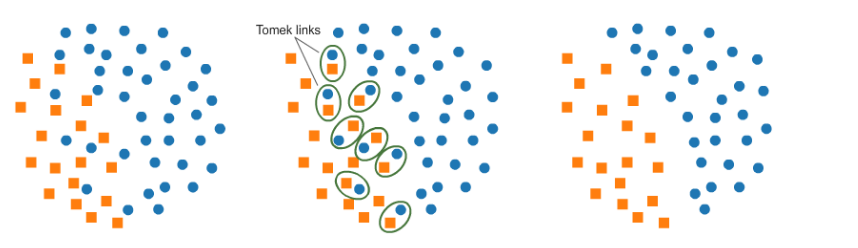

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


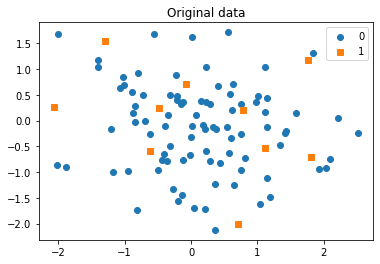

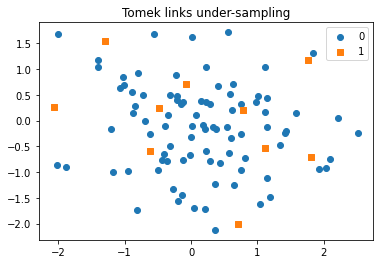

Majority : 90, Minority : 10
Majority : 89, Minority : 10
Remained indices after samling :
 [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


In [ ]:
from imblearn.under_sampling import TomekLinks
import numpy as np
import matplotlib.pyplot as plt

tl = TomekLinks(return_indices = True, ratio = 'majority')

#fit_sample below takes array like X and corresponding labels Y
X_tl, Y_tl, id_tl = tl.fit_sample(X,Y)

X_tomlk = pd.DataFrame(X_tl)
X_tomlk['target'] = Y_tl

plot_2d_space(X,Y, 'Original data')

plot_2d_space(X_tl, Y_tl, 'Tomek links under-sampling')

print(f'Majority : {len(X_samp[X_samp.target==0])}, Minority : {len(X_samp[X_samp.target==1])}')
print(f'Majority : {len(X_tomlk[X_tomlk.target==0])}, Minority : {len(X_tomlk[X_tomlk.target==1])}')
print('Remained indices after samling :\n', id_tl)

In [ ]:
X_tomlk.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,target
0,0.327419,-0.123936,0.377707,-0.650123,0.267562,1.228781,2.208772,-0.185977,0.238732,-2.565438,-0.383111,0.644056,0.104375,-1.703024,-0.510083,-0.108812,-0.230132,1.553707,1.497538,-1.476485,0
1,-0.204642,0.472155,-0.140616,-2.902493,-1.513665,1.149545,2.283673,-0.809117,-1.723535,-0.958556,-0.259129,-0.279701,-1.431391,0.260146,-0.501306,-2.320545,0.422214,1.386474,-0.073335,0.586859,0
2,0.208274,-0.156982,0.063369,-0.545759,-0.395416,-2.679969,1.507772,0.391485,-0.487337,-0.946147,0.339852,-1.011854,-1.124795,0.347291,-1.078836,0.046923,-0.978324,1.100517,-0.697134,0.339577,0
3,0.785568,0.208472,0.760082,-0.046130,0.310844,-0.403927,1.462897,0.962173,-0.520996,1.647360,0.146524,0.316792,-0.261528,-1.260698,0.822700,0.141031,-0.294805,2.216364,-1.129875,-1.059984,1
4,-0.886195,0.548814,-1.844824,0.638066,0.023932,0.491861,0.722346,0.811078,-0.468527,0.035382,-1.944191,-0.751144,0.148616,-0.185694,2.102140,-0.166839,0.088302,0.632036,1.766467,-1.373949,0


##b Oversampling using SMOTE:
* SMOTE - Synthetic Minority Oversampling Technique
* We synthesize the elements of minority class, in the vicinity of already existing elements.
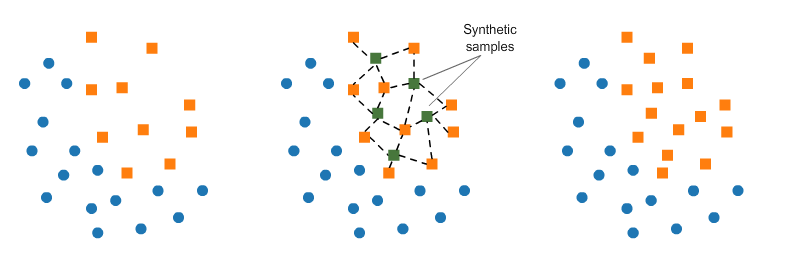

* Other methods in imblearn package for both Undersampling(Cluster Centroids, NearMiss, etc) and Oversampling (ADASYN and bSMOTE).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


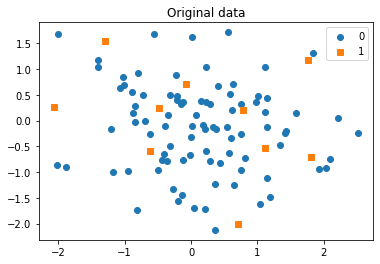

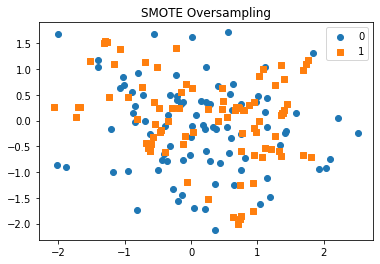

Majority : 90, Minority : 10
Majority : 90,  Minority : 90


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio = 'minority')

X_sm, Y_sm = smote.fit_sample(X,Y)

X_smote = pd.DataFrame(X_sm)
X_smote['target'] = Y_sm

plot_2d_space(X,Y, 'Original data')

plot_2d_space(X_sm,Y_sm, 'SMOTE Oversampling')

print(f'Majority : {len(X_samp[X_samp.target==0])}, Minority : {len(X_samp[X_samp.target==1])}')

print(f'Majority : {len(X_smote[X_smote.target==0])},  Minority : {len(X_smote[X_smote.target==1])}')

#3 Class weights in the models
* Most of the machine learning models provide a parameter `class_weights`.
* In random forest classifier, giving class_weights, we can specify a higher weight for the minority class using a dictionary.

> **Taking example of Logistic Regression**

* In logistic regression we minimize log loss.<br>
`loss = -ylog(p) - (1-y)log(1-p)`
* Above usually we are referring 'a point belong to +ve class'.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight={0:1,1:20})

> **Intuitions from above**
* We specified class weights in logistic regression (majority) -Ve : 1, (minority) +Ve : 20.
* `loss = -20ylog(p) - 1(1-y)log(1-p)`
* If our model gives a probability of a point belong to +ve class : 0.3 and we misclassified that point as +ve, now after giving class weights, New loss becomes -20log(0.3) = 10.45.
* If our model gives a probability of a point belong to +ve class : 0.7 and we misclassified that point as -ve, now after giving class weights, New loss becomes -log(0.3) = 0.52.
* That means we are penalizing our model by 20 times when model misclassifies a positive minority point.

> **Computing class weights**

* There's no particular method for this, have to do this as hyperparameter search problem for particular problem.
* But to calculate class weights based on distribution of Y, do the below.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

cls_wts = compute_class_weight('balanced', np.unique(Y), Y)
print(cls_wts)

[0.55555556 5.        ]


#4 Change your evaluation Metric
* When dealing with imbalanced datasets, choosing the right evaluation metric is pretty important to measure your model.
* Generally used evaluation metric is accuracy which doesn't do well in imbalanced data cases Eg: person has cancer, Meteor hits earth etc.
* So we use F1 Score.
* **F1 Score** : Harmonic mean of Precision and Recall and lies between [0,1].
> F1 Score = 2* {Precision * Recall}/{Precision + Recall}
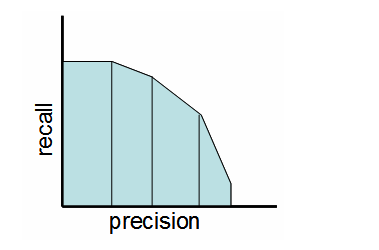

* F1 Score maintains a balance between the precision and recall for your classifier.

> I**f you are a police inspector and you want to catch criminals, you want to be sure that the person you catch is a criminal (Precision) and you also want to capture as many criminals (Recall) as possible. The F1 score manages this tradeoff.**

**Calculating F1 Score for two class classification problem**

In [ ]:
from sklearn.metrics import f1_score

Y_true = [0,1,1,0,1,1]
Y_pred = [0,0,1,0,0,1]

f1_score(Y_true, Y_pred)

0.6666666666666666

**Function for finding best threshold for maximizing F1 score for 2-class classification.**

In [ ]:
#Y_pred is an array of predictions
#in this function threshold is nothing but hyperparameter that model is set on.
#Function is for finding best hyperparameter that gives highest F1 score
def bestThreshold(Y_true, Y_pred):
  best_thres = None
  best_score = 0

  for thresh in np.arange(0.1, 0.501, 0.01):
    score = f1_score(Y_true, np.array(Y_pred)>thresh)
    if(score > best_score):
      best_thresh = thresh
      best_score = score
  return best_score, best_thres

#5 Miscellaneous

##a) Collect more Data
* Try collecting more data if you can, coz nothing is better than this technique.

##b) Treat the problem as anamoly detection

### Anamoly detection :
* Identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data.
* You can use Isolation forests or autoencodes for anamoly detection.

##c) Model Based
* Some models are particularly suited for imbalanced datasets.
* Eg: In boosting models, we give more weights to the cases that get misclassified in each tree iteration.